In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
from scipy.stats import pareto
import math 
import statistics 
from scipy.integrate import quad
from sklearn import preprocessing
import seaborn as sns

In [4]:
def teta_est(x):
    return n/sum(np.log(x)) + 1

In [5]:
n = 100
teta = 5

In [6]:
x = pareto.rvs(b=teta-1, size=n)

In [7]:
teta_e = teta_est(x)
teta_e

5.356339027934849

# Доверительный интервал

## Доверительный интервал для медианы

In [8]:
med_b1 = 2**(1/(teta_e-1)) - 1.96*2**(1/(teta_e-1))*np.log(2)/((teta_e-1)*n**0.5)
med_b2 = 2**(1/(teta_e-1)) + 1.96*2**(1/(teta_e-1))*np.log(2)/((teta_e-1)*n**0.5)

In [9]:
print(f'interval for median: ({med_b1}, {med_b2}) real median: {statistics.median(x)}')

interval for median: (1.1359049698935182, 1.2090342767084803) real median: 1.1842385461468945


## Асимптотический доверительный интервал

In [10]:
as_b1 = teta_e - 1.96*(teta_e - 1)/(n**0.5)
as_b2 = teta_e + 1.96*(teta_e - 1)/(n**0.5)

In [11]:
print(f'interval for theta: ({as_b1}, {as_b2}) real theta: {teta}')

interval for theta: (4.502496578459619, 6.21018147741008) real theta: 5


## Bootstrap 

In [12]:
delta = np.array([])
teta_boot = np.array([])

for i in range(0,1000):
    bootstrap = np.random.choice(x, size = x.shape[0]).round(2) 
    delta = np.append(delta, teta_est(bootstrap) - teta_e)
    teta_boot = np.append(teta_boot, teta_est(bootstrap))
    

delta.sort() 
b1_boot, b2_boot = teta_e - delta[974], teta_e - delta[24] #better if i use 0.974 shape of delta

In [13]:
print(f'bootstrap interval for theta : ({b1_boot}, {b2_boot}) real theta: {teta}')

bootstrap interval for theta : (4.4314483796554835, 6.040076299422471) real theta: 5


## Parametric Bootstrap

In [14]:
delta_par = np.array([])

for i in range(50000):
    bootstrap_par = pareto.rvs(b = teta-1, size=n)
    delta_par = np.append(delta_par, teta_est(bootstrap_par) - teta_e)

delta_par.sort() 
b1_boot_par, b2_boot_par = teta_e - delta_par[int(delta_par.shape[0]*0.974)], teta_e - delta_par[int(delta_par.shape[0]*0.024)]

In [15]:
print(f'parametric bootstrap interval for theta : ({b1_boot_par}, {b2_boot_par}) real theta: {teta}')

parametric bootstrap interval for theta : (4.8044696873343264, 6.398406118767919) real theta: 5


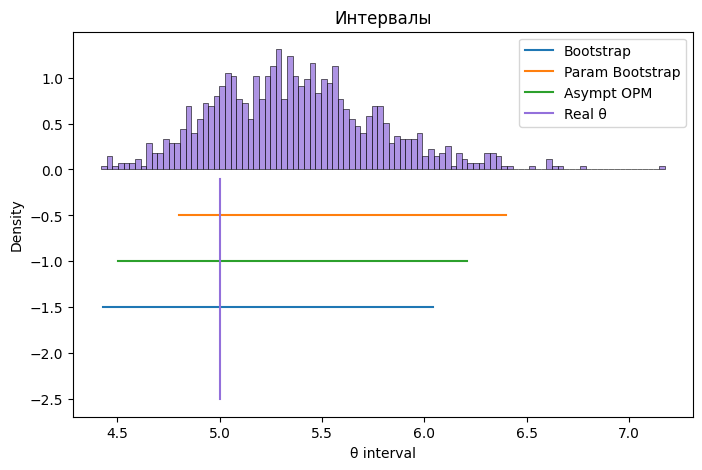

In [25]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot([b1_boot, b2_boot], [-1.5, -1.5], label = 'Bootstrap')
ax.plot([b1_boot_par, b2_boot_par], [-0.5, -0.5], label = 'Param Bootstrap')
ax.plot([as_b1, as_b2], [-1, -1], label = 'Asympt OPM')

ax.plot([teta, teta], [-2.5,-0.1], label = 'Real θ', color = "MediumPurple")

sns.histplot(teta_boot, ax = ax, bins = n, color = 'MediumPurple', stat = 'density')

ax.set_title('Интервалы')    

ax.set_xlabel('θ interval')

ax.legend(loc = 'best')